In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('../data/data_cleaned.csv')
data.head()

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


# Analyse Statistique et Manipulation

### Étude des variables qualitatives

In [65]:
# fonction pour la création des tableaux statistique
def set_table(each_column):
    variable = data[each_column].value_counts().reset_index()
    variable.rename(columns={'count':'effectifs'}, inplace=True)
    variable['frequences'] = (variable['effectifs'] / variable['effectifs'].sum()).round(3)
    variable['frequences_cumul'] = (variable['frequences'].cumsum()).round(3)
    return variable

--------------------------------------------------
Variable sales_person
Mode:  ['Kelci Walkden']


,sales_person,effectifs,frequences,frequences_cumul
0,Kelci Walkden,54,0.049,0.049
1,Brien Boise,53,0.048,0.097
2,Van Tuxwell,51,0.047,0.144
3,Beverie Moffet,50,0.046,0.190
4,Oby Sorrel,49,0.045,0.235
5,Dennison Crosswaite,49,0.045,0.280
6,Ches Bonnell,48,0.044,0.324
7,Gigi Bohling,47,0.043,0.367
8,Karlen McCaffrey,47,0.043,0.410
9,Curtice Advani,46,0.042,0.452


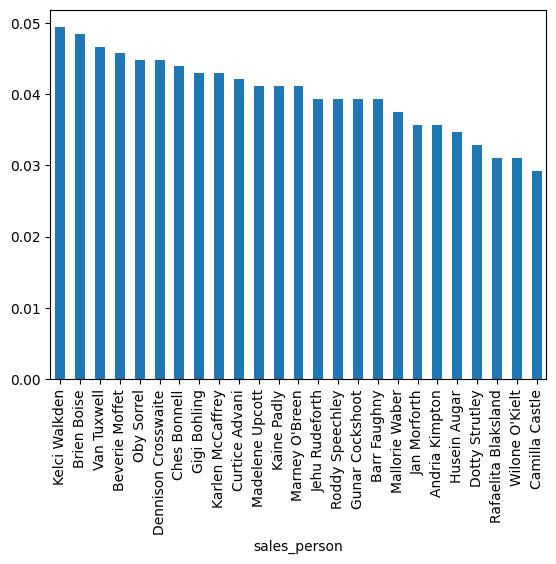

--------------------------------------------------
Variable country
Mode:  ['Australia']


,country,effectifs,frequences,frequences_cumul
0,Australia,205,0.187,0.187
1,India,184,0.168,0.355
2,USA,179,0.164,0.519
3,UK,178,0.163,0.682
4,Canada,175,0.160,0.842
5,New Zealand,173,0.158,1.000


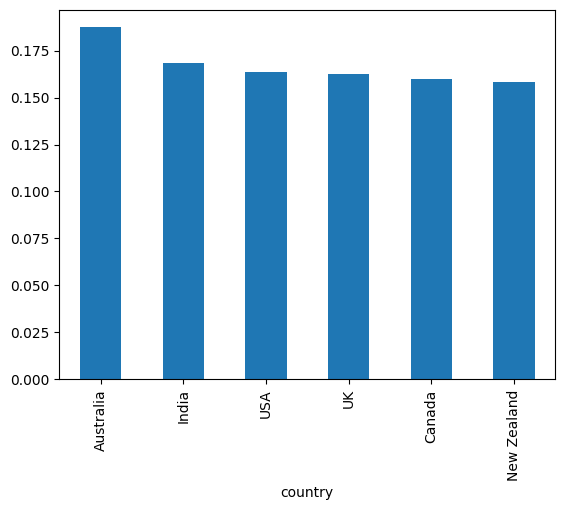

--------------------------------------------------
Variable product
Mode:  ['50% Dark Bites' 'Eclairs']


,product,effectifs,frequences,frequences_cumul
0,Eclairs,60,0.055,0.055
1,50% Dark Bites,60,0.055,0.110
2,Smooth Sliky Salty,59,0.054,0.164
3,White Choc,58,0.053,0.217
4,Drinking Coco,56,0.051,0.268
5,Spicy Special Slims,54,0.049,0.317
6,Organic Choco Syrup,52,0.048,0.365
7,85% Dark Bars,50,0.046,0.411
8,Fruit & Nut Bars,50,0.046,0.457
9,After Nines,50,0.046,0.503


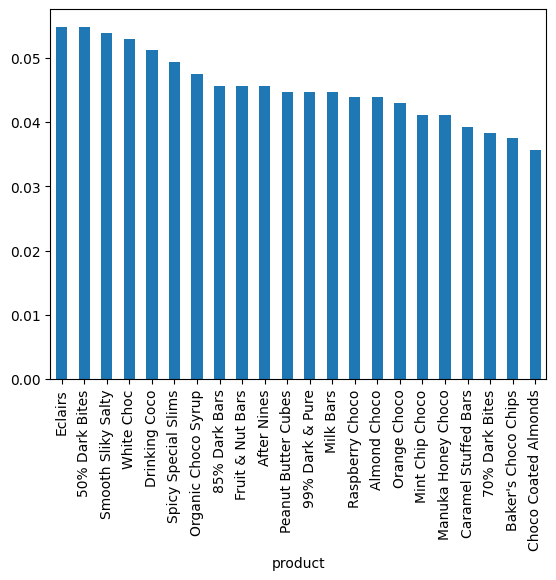

In [66]:
for column in ['sales_person', 'country', 'product']:
    print('-'*50)
    print('Variable', column)
    table = set_table(column)
    print('Mode: ', data[column].mode().values)
    display(table.iloc[:10, ])
    data[column].value_counts(normalize=True).plot(kind='bar')
    plt.show()


### Déduction d'analyse :

- **Kelci Walkden** a réalisé le plus grand nombre de ventes au cours de l'année.
- **L'australie** comptabilise sur son territoire le plus grand nombre de ventes au cours de l'année.
- Les **Eclairs** et les **50% Dark Bites** sont les chocolats les plus vendus au cours de l'année.

### Étude des variables quantitatives

In [67]:
data.head()

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


--------------------------------------------------
Variable amount
Moyenne : 5652.308
Médiane : 4868.5
Écart-type : 4102.442
Skewness : 0.892


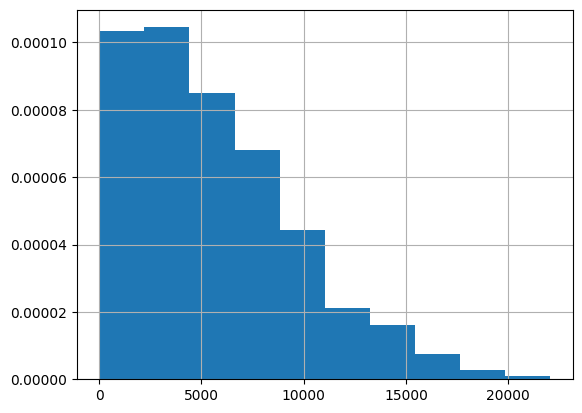

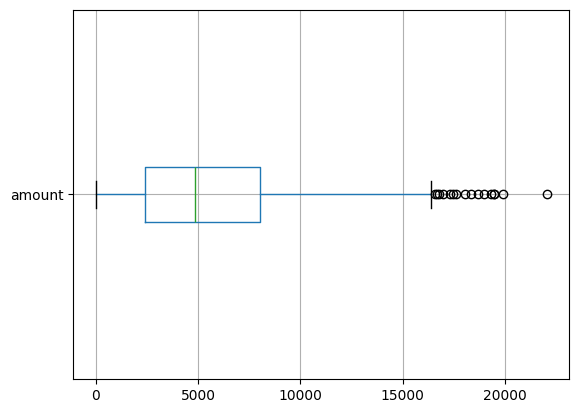

--------------------------------------------------
Variable boxes_shipped
Moyenne : 161.798
Médiane : 135.0
Écart-type : 121.544
Skewness : 1.113


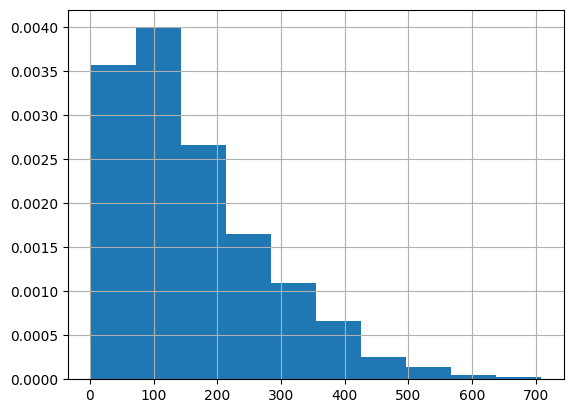

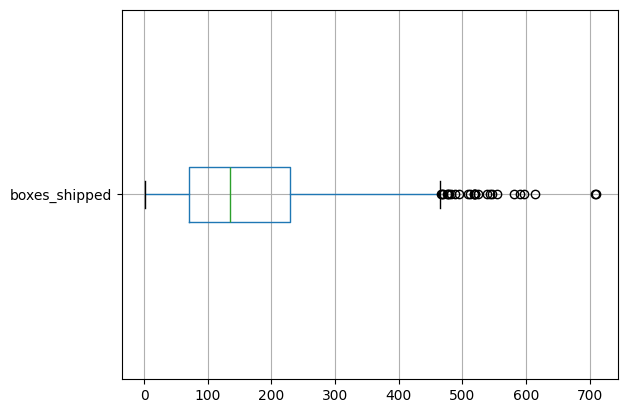

In [68]:
for column in ['amount', 'boxes_shipped']:
    print('-'*50)
    print('Variable', column)
    print('Moyenne :', data[column].mean().round(3))
    print('Médiane :', data[column].median())

    print('Écart-type :', data[column].std().round(3))
    print('Skewness :', data[column].skew().round(3))

    data[column].hist(density=True)
    plt.show()
    data.boxplot(column, vert=False)
    plt.show()


### Déduction de l'analyse

- Le Skewness étant positif pour nos deux variables, leur distribution est étalée à droite. On en déduit que les ventes aux montants élevés sont moins courantes, ce qui entraine du coup un faible nombre d'expéditions pour les grandes cargaisons de boîtes de chocolat.

### Corrélation entre le montant des ventes et le nombre de boîtes de chocolat expédiées

In [69]:
np.corrcoef(data['amount'], data['boxes_shipped'])

array([[ 1.        , -0.01882685],
       [-0.01882685,  1.        ]])